# Data Exploration 1

### Imports and getting set up

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

### DB Connection & Call

In [2]:
confile = list(pd.read_csv('../../dbcon.csv'))
postgres_db = 'useducation'
db_connection = 'postgresql://{}:{}@{}:{}/{}'.format(confile[0], confile[1], confile[2], confile[3], postgres_db)

In [19]:
query = '''
SELECT *
FROM useducation
;'''

useducation = pd.read_sql(query, db_connection)
useducation.sort_values('PRIMARY_KEY').reset_index(drop=True).head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_AMERICAN_SAMOA,AMERICAN_SAMOA,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,981.0,886.0,748.0,7969.0,3355.0,12786.0,NaN,NaN,NaN,NaN
3,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
4,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665


In [26]:
useducation['ENROLL'].isna().sum()

263

In [28]:
fillcols = [column for column in useducation.columns if (useducation[column].isna().sum() > 0) & (useducation[column].isna().sum() < 200)]
for col in fillcols:
    useducation.loc[:, col] = useducation.loc[:, col].fillna(useducation.loc[:, col].mean())

#### 1. Derive the descriptive statistics of the data and discuss the points you find remarkable.

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492.000000,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,...,1492.000000,1492.000000,1492.000000,1.492000e+03,1.492000e+03,1.492000e+03,1492.000000,1492.000000,1492.000000,1492.000000
mean,2004.433646,9.159308e+05,9.092082e+06,7.663723e+05,4.216553e+06,4.109157e+06,9.196681e+06,4.762966e+06,2.680331e+06,4.292046e+05,...,64538.927259,64271.057311,54268.924320,5.192140e+05,2.470714e+05,8.024415e+05,234.768293,278.414711,218.866154,263.661132
std,7.393983,9.667725e+05,1.087818e+07,1.060702e+06,5.133895e+06,5.078230e+06,1.109393e+07,5.828468e+06,3.105812e+06,4.846832e+05,...,76684.998585,75364.301721,64838.328605,6.147133e+05,2.938773e+05,9.126522e+05,6.122843,6.063038,4.641053,3.928132
min,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,633.000000,437.000000,311.000000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102
25%,1998.000000,3.150940e+05,2.546261e+06,2.170200e+05,1.356434e+06,9.447962e+05,2.523968e+06,1.343611e+06,7.673688e+05,1.354282e+05,...,15195.500000,15682.750000,13437.000000,1.211522e+05,5.919750e+04,2.293578e+05,234.768293,278.414711,218.866154,263.661132
50%,2004.000000,8.204140e+05,6.359310e+06,5.167410e+05,3.127639e+06,2.697257e+06,6.520224e+06,3.358142e+06,1.913844e+06,3.672335e+05,...,49884.500000,49571.000000,39566.000000,4.015865e+05,1.817010e+05,6.473260e+05,234.768293,278.414711,218.866154,263.661132
75%,2011.000000,9.211780e+05,9.276958e+06,7.663723e+05,4.269811e+06,4.109157e+06,9.434922e+06,4.938820e+06,2.795888e+06,4.568915e+05,...,71814.250000,72131.000000,64616.250000,5.749118e+05,2.825390e+05,8.724220e+05,234.768293,278.414711,218.866154,263.661132
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,5.944746e+06,253.420961,300.568235,236.773867,280.499130


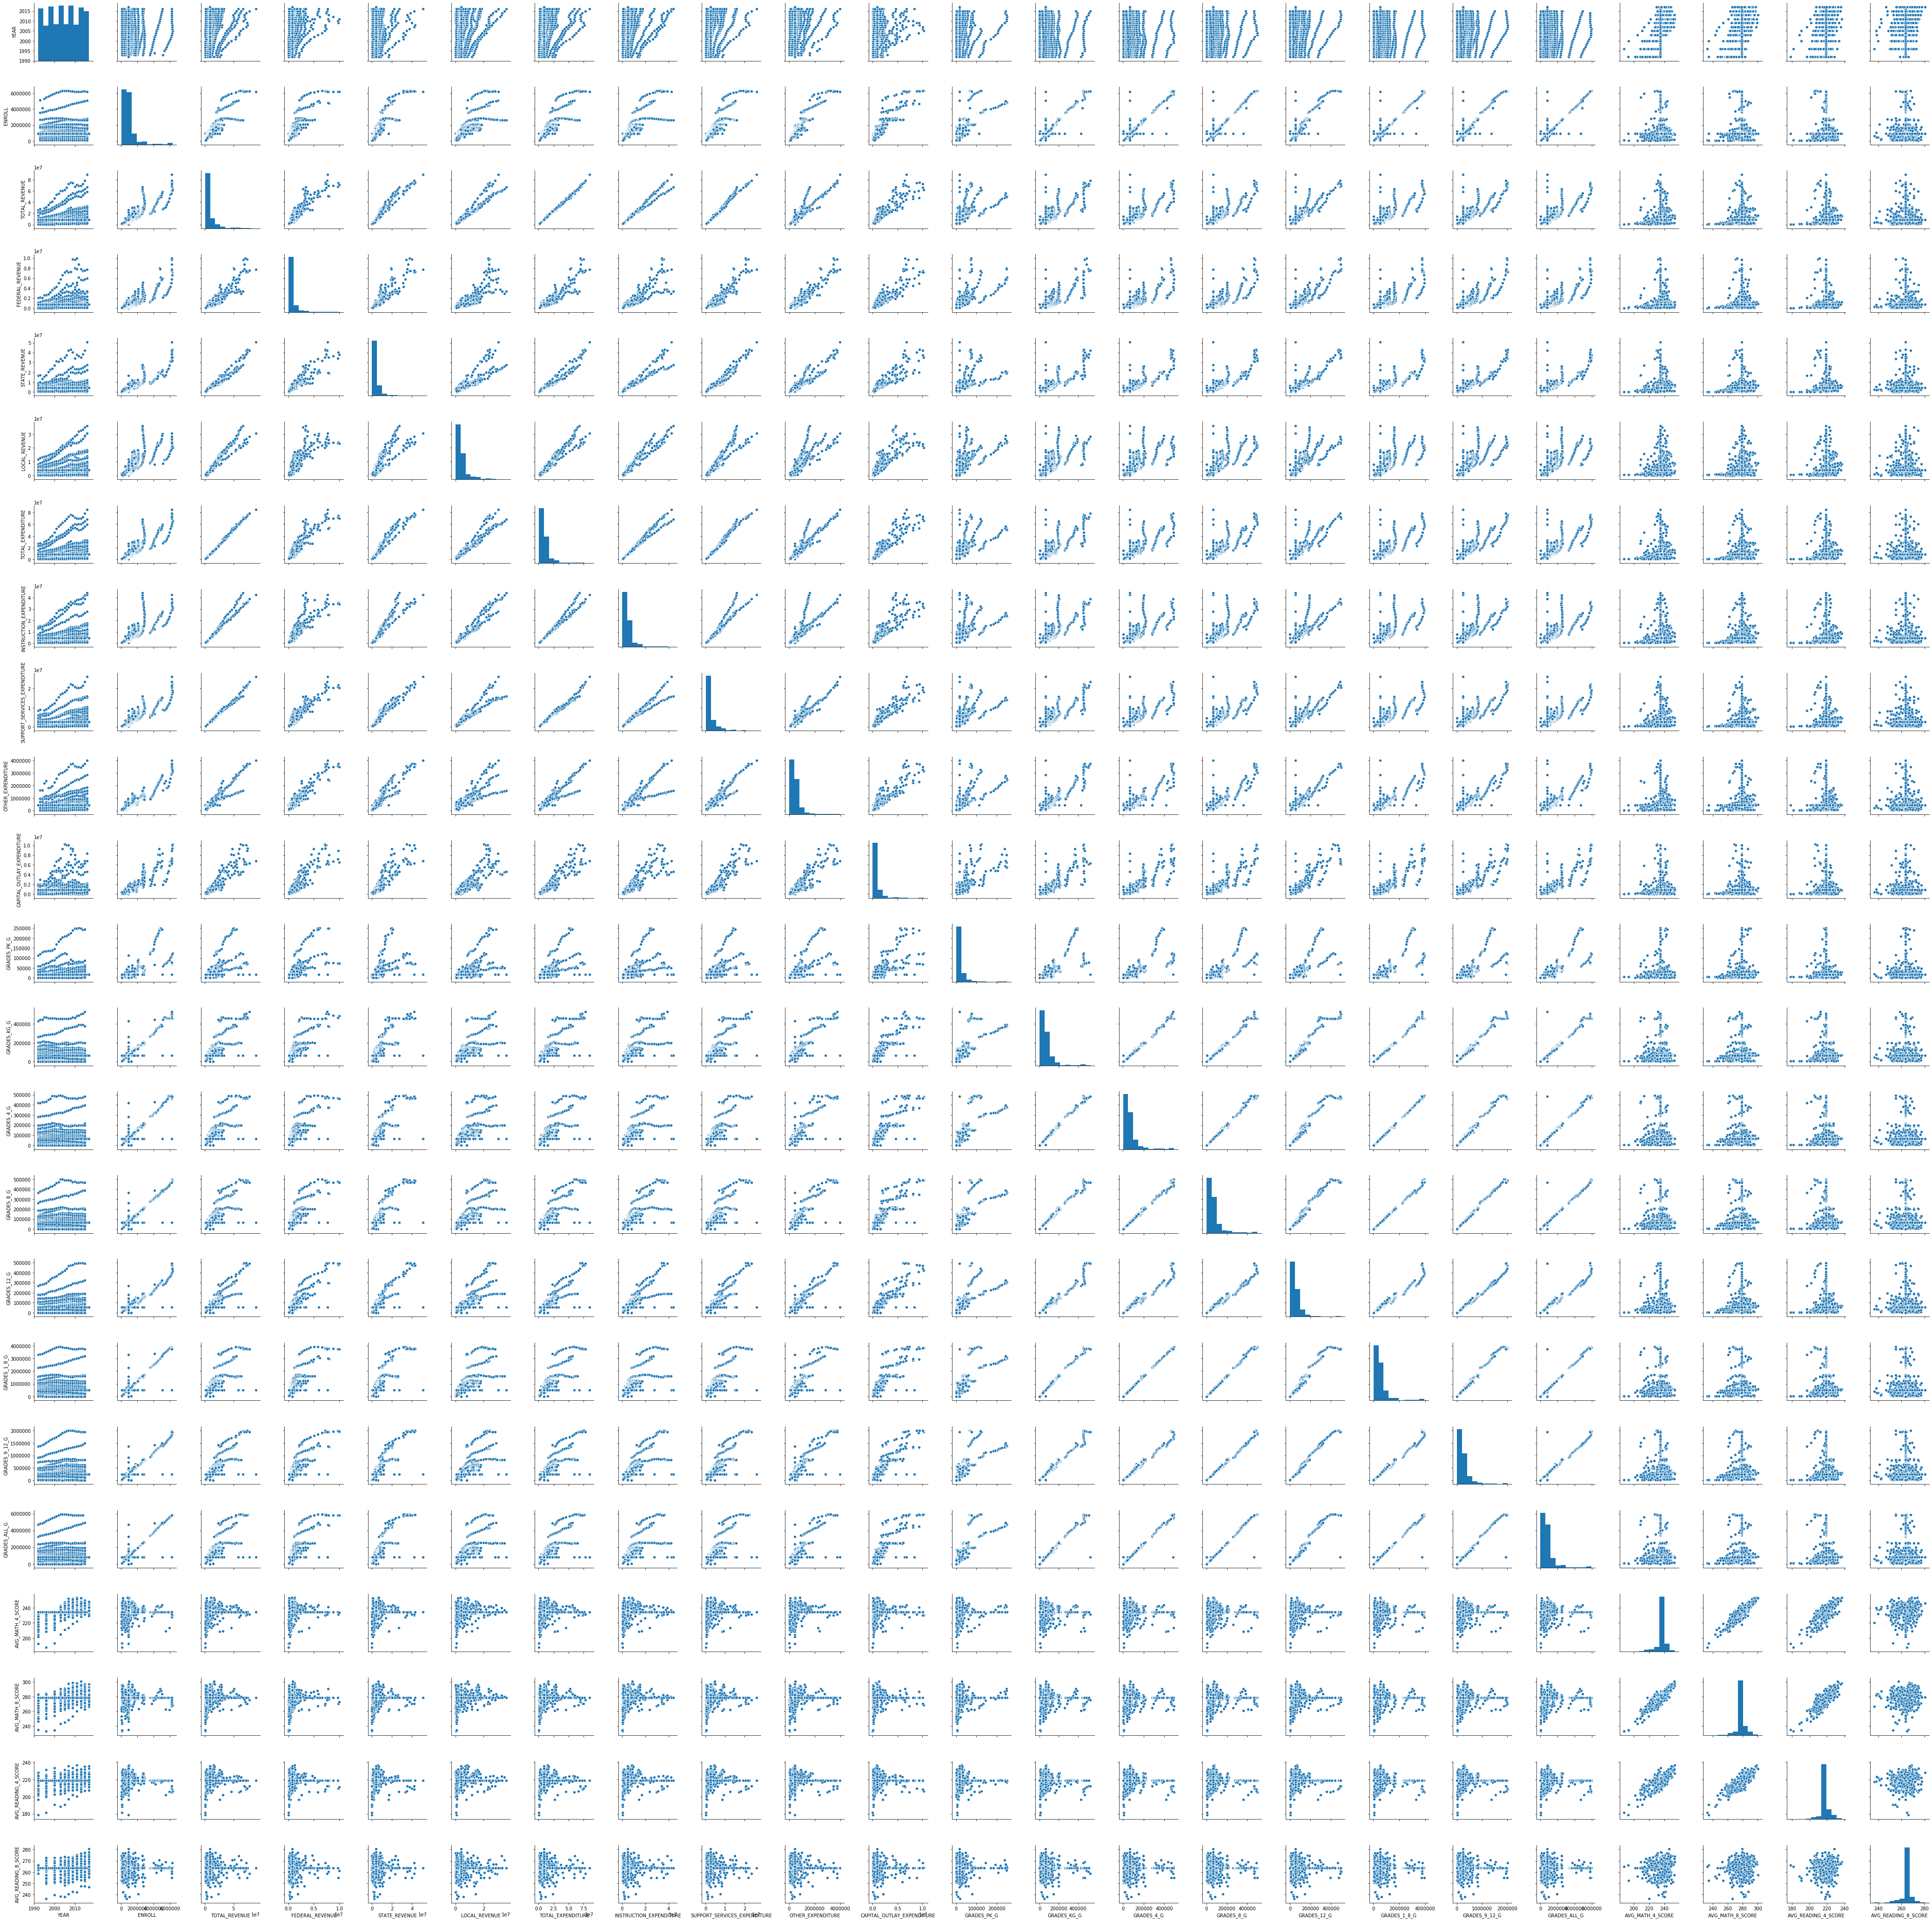

In [5]:
display(useducation.describe())
sns.pairplot(useducation) #jointplot
plt.show()

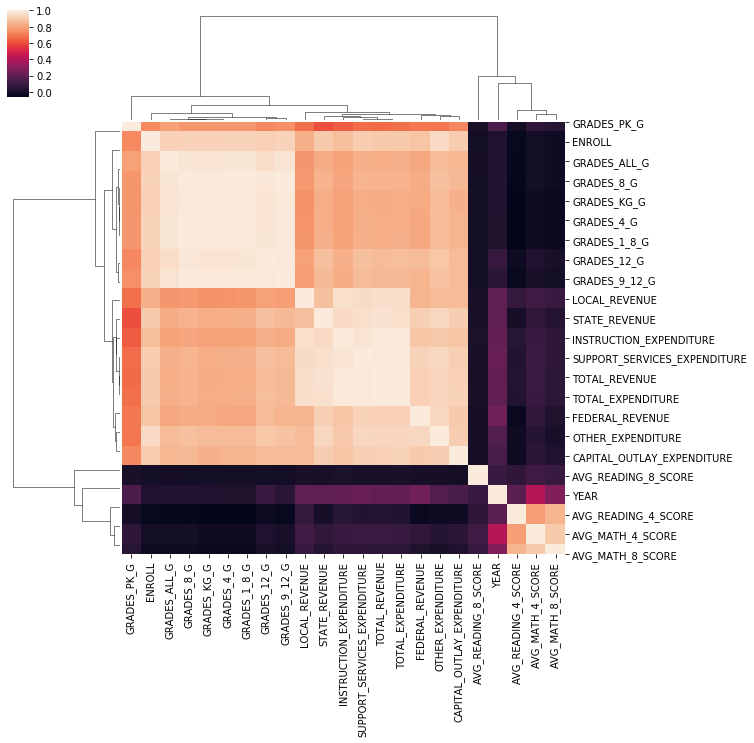

In [6]:
sns.clustermap(useducation.corr())
plt.show()

<span style="color:blue">There seems to be two clusters of features that seem to be highly corrleated among each other</span>

#### 2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

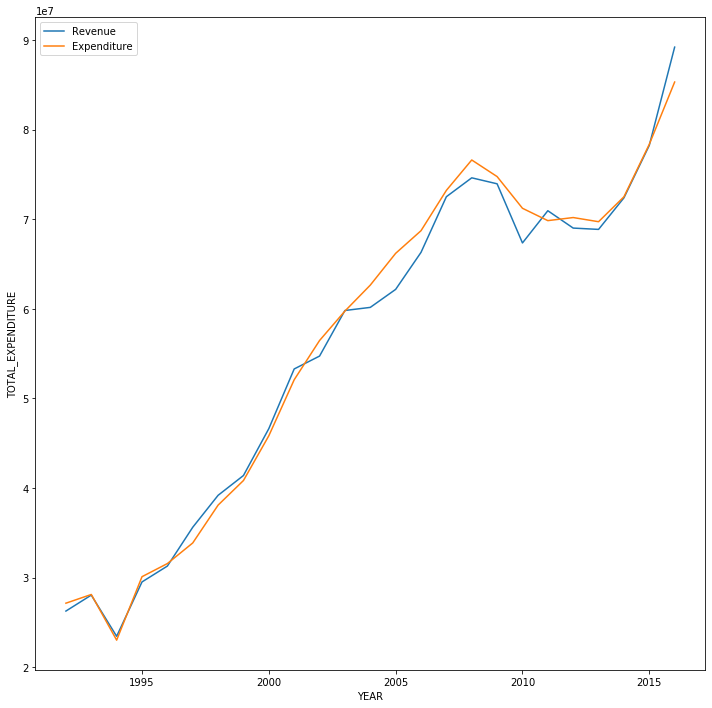

In [29]:
plt.figure(figsize=(12,12))
calieducation = useducation[useducation['STATE'] == 'CALIFORNIA']
sns.lineplot(calieducation['YEAR'], calieducation['TOTAL_REVENUE'], label='Revenue')
sns.lineplot(calieducation['YEAR'], calieducation['TOTAL_EXPENDITURE'], label='Expenditure')
plt.legend()
plt.show()

<span style="color:blue">It looks like the year of 2016 might be cut off, doesn't look complete, maybe it was an incomplete year and is throwing off the data.  There's another peak in 2008 right before the recession where we see a sharp decline in revenue and expenditure.  The Northridge earthquake in the Greater LA area happened in 1994 which could explain the dip in Expenditure and Revenue.  The quake cost the state today's equivalent of $76bn.</span>

#### 3. In your chosen state, which of the lessons are the students more successful, math or reading?

In [30]:
calieducation.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN
56,1993_CALIFORNIA,CALIFORNIA,1993,5129788.0,28043338.0,2151157.0,17064146.0,8828035.0,28110986.0,15281147.0,...,420233.0,380223.0,277271.0,3328627.0,1393530.0,4782111.0,NaN,NaN,NaN,NaN
108,1994_CALIFORNIA,CALIFORNIA,1994,4120498.0,23440845.0,2095878.0,13175550.0,8169417.0,23012688.0,12443864.0,...,426919.0,388561.0,285132.0,3372294.0,1421547.0,4860291.0,NaN,NaN,NaN,NaN
161,1995_CALIFORNIA,CALIFORNIA,1995,5299405.0,29512214.0,2612241.0,15541486.0,11358487.0,30097549.0,16146416.0,...,428553.0,399039.0,287428.0,3430751.0,1464841.0,4964774.0,NaN,NaN,NaN,NaN
213,1996_CALIFORNIA,CALIFORNIA,1996,5460484.0,31282981.0,2603882.0,17061474.0,11617625.0,31561692.0,16880730.0,...,435217.0,406456.0,298669.0,3516572.0,1525618.0,5115423.0,209.129083,262.772478,201.912591,269.197451


In [31]:
calieddiff = pd.DataFrame()
calieddiff['YEAR'] = calieducation['YEAR']
calieddiff['Year4'] = (calieducation['AVG_MATH_4_SCORE']  - calieducation['AVG_READING_4_SCORE']) >= 0
calieddiff['Year8'] = (calieducation['AVG_MATH_8_SCORE']  - calieducation['AVG_READING_8_SCORE']) >= 0
display(
    calieddiff['Year4'].value_counts(),
    calieddiff['Year8'].value_counts(),
)

False    15
True     11
Name: Year4, dtype: int64

False    18
True      8
Name: Year8, dtype: int64

<span style="color:blue">Math is stronger</span>

#### 4. What are the distributions of the math and reading scores in the sample?

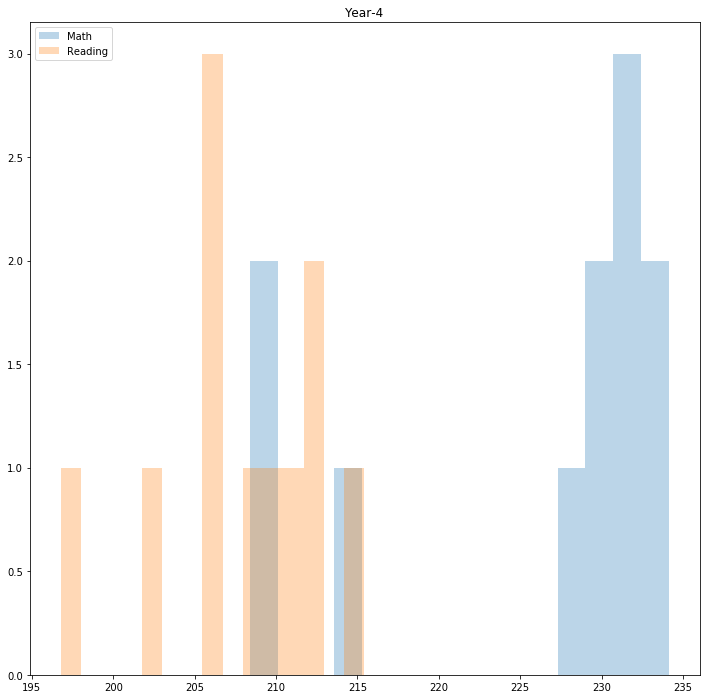

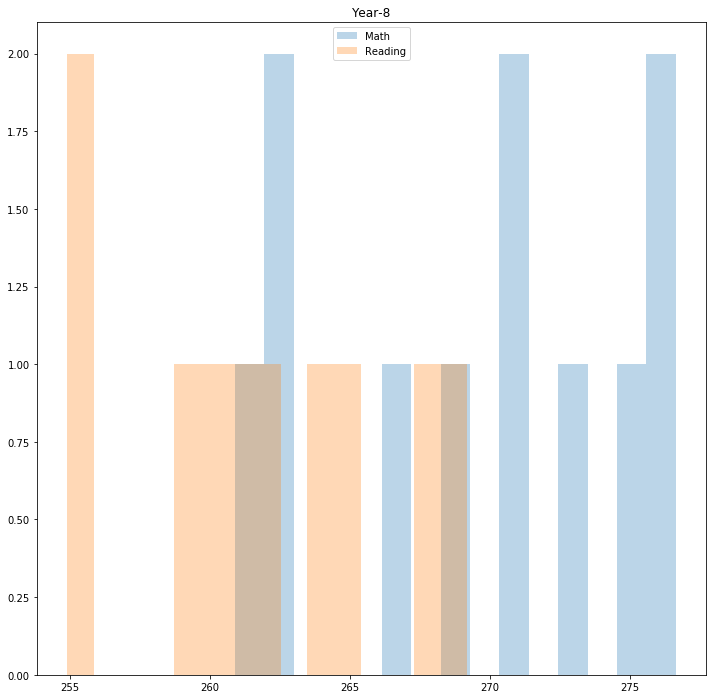

In [32]:
plt.figure(figsize=(12,12))
plt.hist(calieducation['AVG_MATH_4_SCORE'].dropna(), bins=15, alpha=0.3, label='Math')
plt.hist(calieducation['AVG_READING_4_SCORE'].dropna(), bins=15, alpha=0.3, label='Reading')
plt.title('Year-4')
plt.legend()
plt.show()

plt.figure(figsize=(12,12))
plt.hist(calieducation['AVG_MATH_8_SCORE'].dropna(), bins=15, alpha=0.3, label='Math')
plt.hist(calieducation['AVG_READING_8_SCORE'].dropna(), bins=15, alpha=0.3, label='Reading')
plt.title('Year-8')
plt.legend()
plt.show()

#### 5. Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.

In [38]:
calieducation.isna().sum().sort_values(ascending=False).head()

AVG_READING_8_SCORE    16
AVG_MATH_8_SCORE       15
AVG_MATH_4_SCORE       15
AVG_READING_4_SCORE    15
OTHER_EXPENDITURE       2
dtype: int64

In [40]:
calieducation1 = calieducation.copy() #copy cali education for mean fill
calieducation2 = calieducation.copy() #copy cali education for median fill
calieducation3 = calieducation.copy() #copy cali education for linear fill
fillcols = ['AVG_READING_8_SCORE', 'AVG_MATH_8_SCORE', 'AVG_MATH_4_SCORE', 'AVG_READING_4_SCORE']

AVG_READING_4_SCORE    0
AVG_MATH_4_SCORE       0
AVG_MATH_8_SCORE       0
AVG_READING_8_SCORE    0
dtype: int64

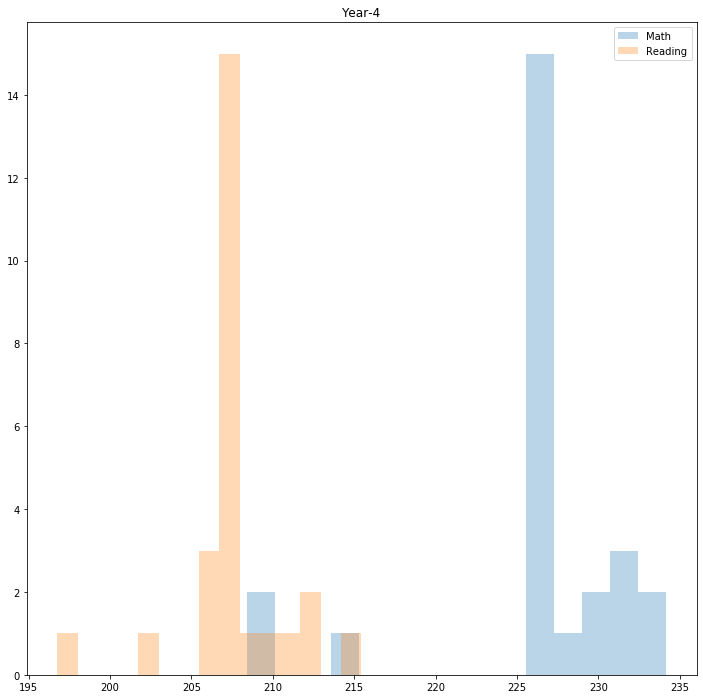

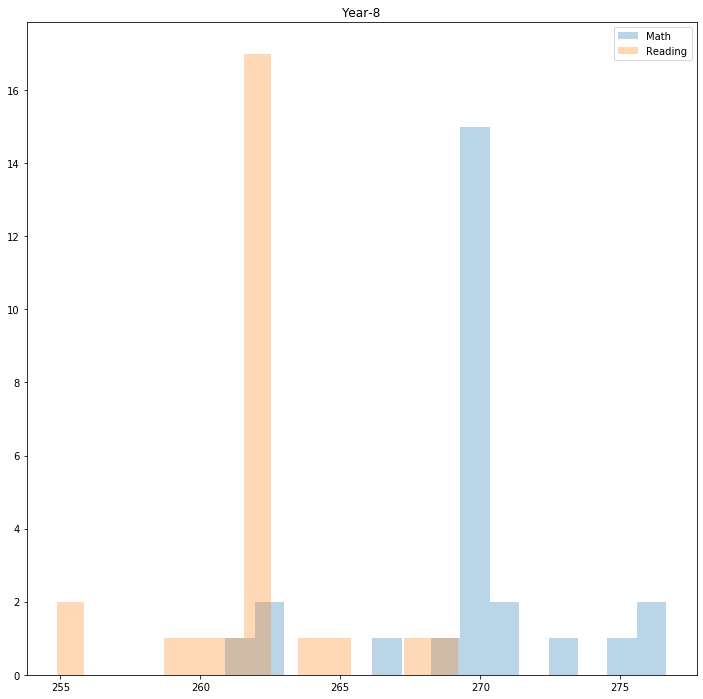

In [45]:
for col in fillcols:
    calieducation1.loc[:, col] = calieducation1.loc[:, col].fillna(calieducation1.loc[:, col].mean())
display(calieducation1[fillcols].isna().sum().sort_values(ascending=False).head())

plt.figure(figsize=(12,12))
plt.hist(calieducation1['AVG_MATH_4_SCORE'].dropna(), bins=15, alpha=0.3, label='Math')
plt.hist(calieducation1['AVG_READING_4_SCORE'].dropna(), bins=15, alpha=0.3, label='Reading')
plt.title('Year-4')
plt.legend()
plt.show()

plt.figure(figsize=(12,12))
plt.hist(calieducation1['AVG_MATH_8_SCORE'].dropna(), bins=15, alpha=0.3, label='Math')
plt.hist(calieducation1['AVG_READING_8_SCORE'].dropna(), bins=15, alpha=0.3, label='Reading')
plt.title('Year-8')
plt.legend()
plt.show()

AVG_READING_4_SCORE    0
AVG_MATH_4_SCORE       0
AVG_MATH_8_SCORE       0
AVG_READING_8_SCORE    0
dtype: int64

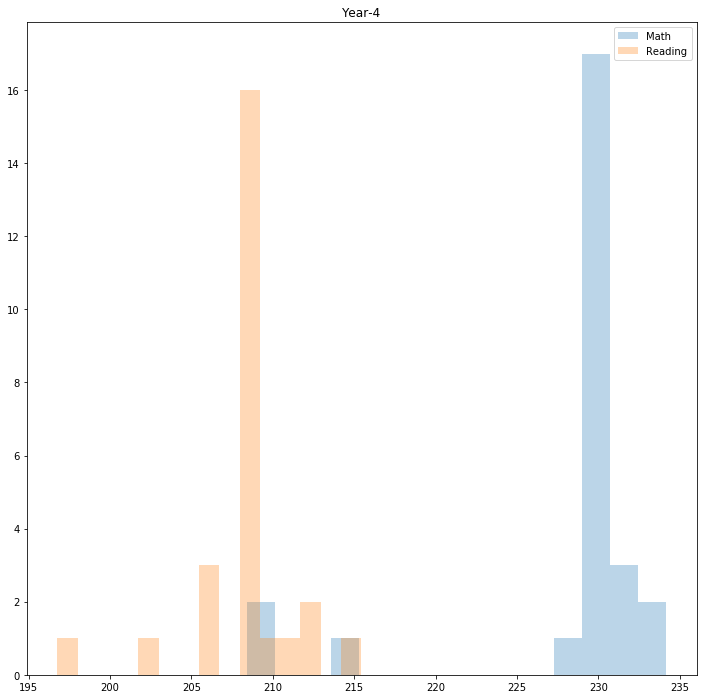

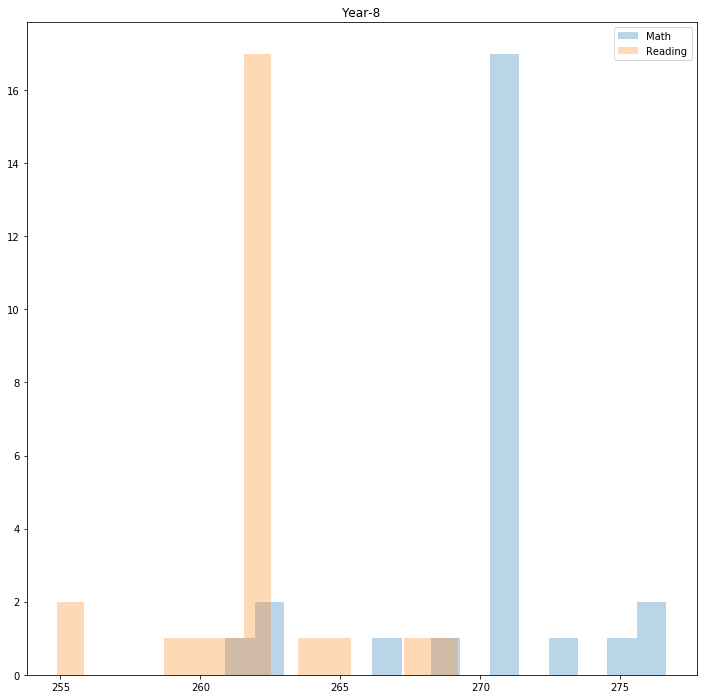

In [46]:
for col in fillcols:
    calieducation2.loc[:, col] = calieducation2.loc[:, col].fillna(calieducation2.loc[:, col].median())
display(calieducation2[fillcols].isna().sum().sort_values(ascending=False).head())

plt.figure(figsize=(12,12))
plt.hist(calieducation2['AVG_MATH_4_SCORE'].dropna(), bins=15, alpha=0.3, label='Math')
plt.hist(calieducation2['AVG_READING_4_SCORE'].dropna(), bins=15, alpha=0.3, label='Reading')
plt.title('Year-4')
plt.legend()
plt.show()

plt.figure(figsize=(12,12))
plt.hist(calieducation2['AVG_MATH_8_SCORE'].dropna(), bins=15, alpha=0.3, label='Math')
plt.hist(calieducation2['AVG_READING_8_SCORE'].dropna(), bins=15, alpha=0.3, label='Reading')
plt.title('Year-8')
plt.legend()
plt.show()

AVG_READING_8_SCORE    4
AVG_READING_4_SCORE    0
AVG_MATH_4_SCORE       0
AVG_MATH_8_SCORE       0
dtype: int64

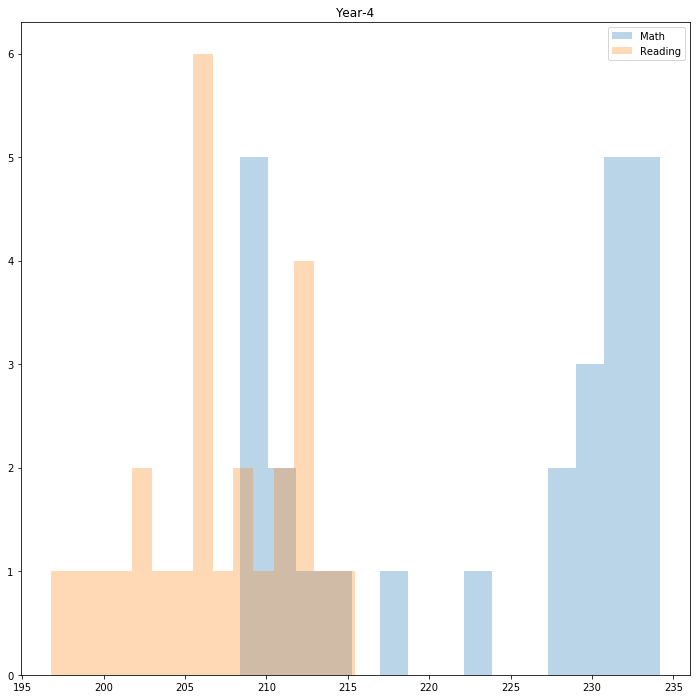

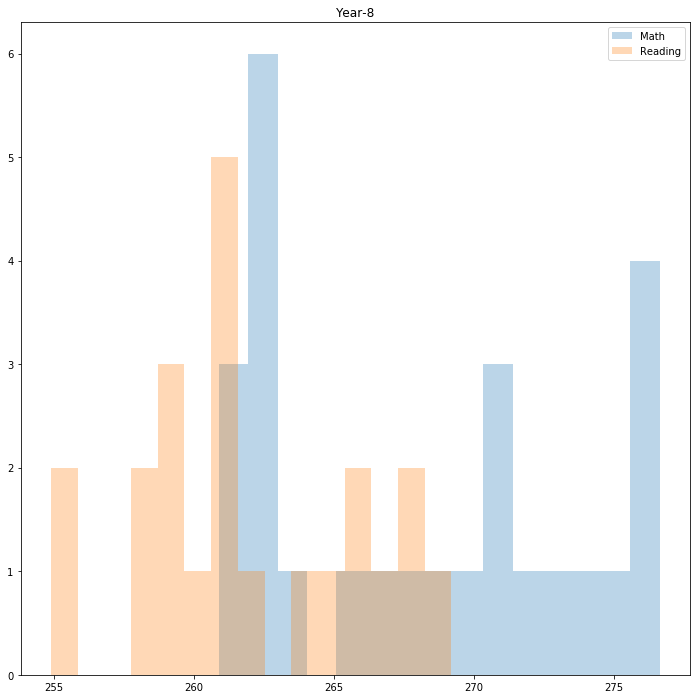

In [49]:
for col in fillcols:
    calieducation3.loc[:, col] = calieducation3.loc[:, col].interpolate(method='linear')
display(calieducation3[fillcols].isna().sum().sort_values(ascending=False).head())

plt.figure(figsize=(12,12))
plt.hist(calieducation3['AVG_MATH_4_SCORE'].dropna(), bins=15, alpha=0.3, label='Math')
plt.hist(calieducation3['AVG_READING_4_SCORE'].dropna(), bins=15, alpha=0.3, label='Reading')
plt.title('Year-4')
plt.legend()
plt.show()

plt.figure(figsize=(12,12))
plt.hist(calieducation3['AVG_MATH_8_SCORE'].dropna(), bins=15, alpha=0.3, label='Math')
plt.hist(calieducation3['AVG_READING_8_SCORE'].dropna(), bins=15, alpha=0.3, label='Reading')
plt.title('Year-8')
plt.legend()
plt.show()

<span style="color:blue">Filling nulls has a major affect on the distributions, with interpolation showing the most.  However, since there was such a large number of nulls to begin with, it's understandable that filling in values will have this affect.  We must be weary of any model created from this data since accuracy is likely going to be poor for any predictions.</span>